# **REDES NEURAIS ARTIFICIAIS E DEEP LEARNING**

# **PROPOSTAS AC**

## **PROPOSTA**

### GRUPO

- Mateus Padilha, Ian, Breno, Brenda.


### **PROPOSTA 04**

### GRUPO: Mateus Padilha, Ian, Breno, Brenda.

**Detecção de Spam em SMS**

O objetivo do trabalho é construir um classificador de texto para identificar se uma mensagem SMS é spam ou não ("ham").

**Dataset:** "SMS Spam Collection Data Set" do repositório [UCI Machine Learning](https://archive.ics.uci.edu/dataset/228/sms+spam+collection).

TAREFA

O grupo deverá implementar uma arquitetura RNN para identificar se uma mensagem SMS é spam ou não.



# **1. IMPORTAÇÃO DE BIBLIOTECAS**

Esta célula reúne todas as bibliotecas necessárias para o projeto de detecção de spam em mensagens SMS,utilizando Redes Neurais Recorrentes (RNN). A seguir, cada grupo é descrito com sua função no pipeline.

In [ ]:
# 🔢 Manipulação e análise de dados
import numpy as np            # Operações matemáticas vetorizadas e manipulação de arrays
import pandas as pd           # Leitura, organização e tratamento de dados tabulares (DataFrames)

# 📊 Visualização
import matplotlib.pyplot as plt   # Criação de gráficos básicos (curvas de aprendizado, ROC, etc.)
import seaborn as sns             # Visualizações estatísticas aprimoradas (ex.: matriz de confusão colorida)

# ⚙️ Machine Learning Clássico
from sklearn.model_selection import train_test_split           # Divide o dataset em treino e teste
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc  # Métricas de desempenho

# 🧠 Deep Learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer       # Tokenização de texto
from tensorflow.keras.preprocessing.sequence import pad_sequences # Padronização do comprimento das sequências
from tensorflow.keras.models import Sequential                   # Modelo sequencial base
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional  # Camadas da rede
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau             # Callbacks para regularização e controle do treino

# 📂 Utilitários
import zipfile    # Manipulação de arquivos compactados (.zip)
import os         # Operações de sistema (caminhos e manipulação de arquivos)

# ----------------------------------------------------------------------------
# Esta célula prepara o ambiente técnico necessário para todo o pipeline do projeto:
# desde o carregamento e limpeza dos dados até a construção, treinamento e avaliação
# do modelo RNN para classificação de mensagens SMS em 'spam' ou 'ham'.
# ----------------------------------------------------------------------------



# **2. CARREGAMENTO E EXPLORAÇÃO DOS DADOS**
 Nesta etapa, o dataset é carregado, extraído (caso esteja compactado) e analisado de forma exploratória. O objetivo é compreender a estrutura dos dados e verificar sua integridade antes do pré-processamento.


In [ ]:
# Caminho do arquivo compactado (.zip)
zip_path = 'sms+spam+collection.zip'

# Extração do conteúdo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extrai todos os arquivos para o diretório atual

# O arquivo principal esperado chama-se 'SMSSpamCollection'
data_path = 'SMSSpamCollection'

# Leitura dos dados em um DataFrame
# O dataset é separado por tabulação ('\t') e não possui cabeçalho
df = pd.read_csv(data_path, sep='\t', header=None, names=['label', 'message'])

# ----------------------------------------------------------------------------
# 🔍 ANÁLISE EXPLORATÓRIA
# ----------------------------------------------------------------------------
print("=" * 80)
print("ANÁLISE EXPLORATÓRIA DOS DADOS")
print("=" * 80)

# Tamanho do dataset (linhas x colunas)
print(f"\nShape do dataset: {df.shape}")

# Primeiras 10 linhas do dataset
print(f"\nPrimeiras linhas:")
print(df.head(10))

# Informações gerais: tipos de dados e presença de valores nulos
print(f"\nInformações do dataset:")
print(df.info())

# Verificação de valores ausentes
print(f"\nValores nulos:")
print(df.isnull().sum())

# Distribuição das classes: número de mensagens 'ham' (não spam) e 'spam'
print(f"\nDistribuição das classes:")
print(df['label'].value_counts())

# Proporção percentual das classes
print(f"\nProporção:")
print(df['label'].value_counts(normalize=True))

# ----------------------------------------------------------------------------
# 📏 Estatísticas sobre o comprimento das mensagens
# ----------------------------------------------------------------------------
# Criação de novas colunas com:
# - número total de caracteres (message_length)
# - número de palavras (word_count)
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Estatísticas descritivas por classe
print(f"\nEstatísticas do tamanho das mensagens (caracteres):")
print(df.groupby('label')['message_length'].describe())

print(f"\nEstatísticas do número de palavras:")
print(df.groupby('label')['word_count'].describe())

# ----------------------------------------------------------------------------
# Esta célula garante que o conjunto de dados foi carregado corretamente,
# identifica possíveis desequilíbrios de classe e fornece informações úteis
# para definir estratégias de pré-processamento e modelagem.
# ----------------------------------------------------------------------------


ANÁLISE EXPLORATÓRIA DOS DADOS

Shape do dataset: (5572, 2)

Primeiras linhas:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   

# **3. VISUALIZAÇÕES**
Esta célula tem como objetivo representar graficamente as principais características do dataset,facilitando a interpretação da distribuição de classes e das propriedades textuais das mensagens.


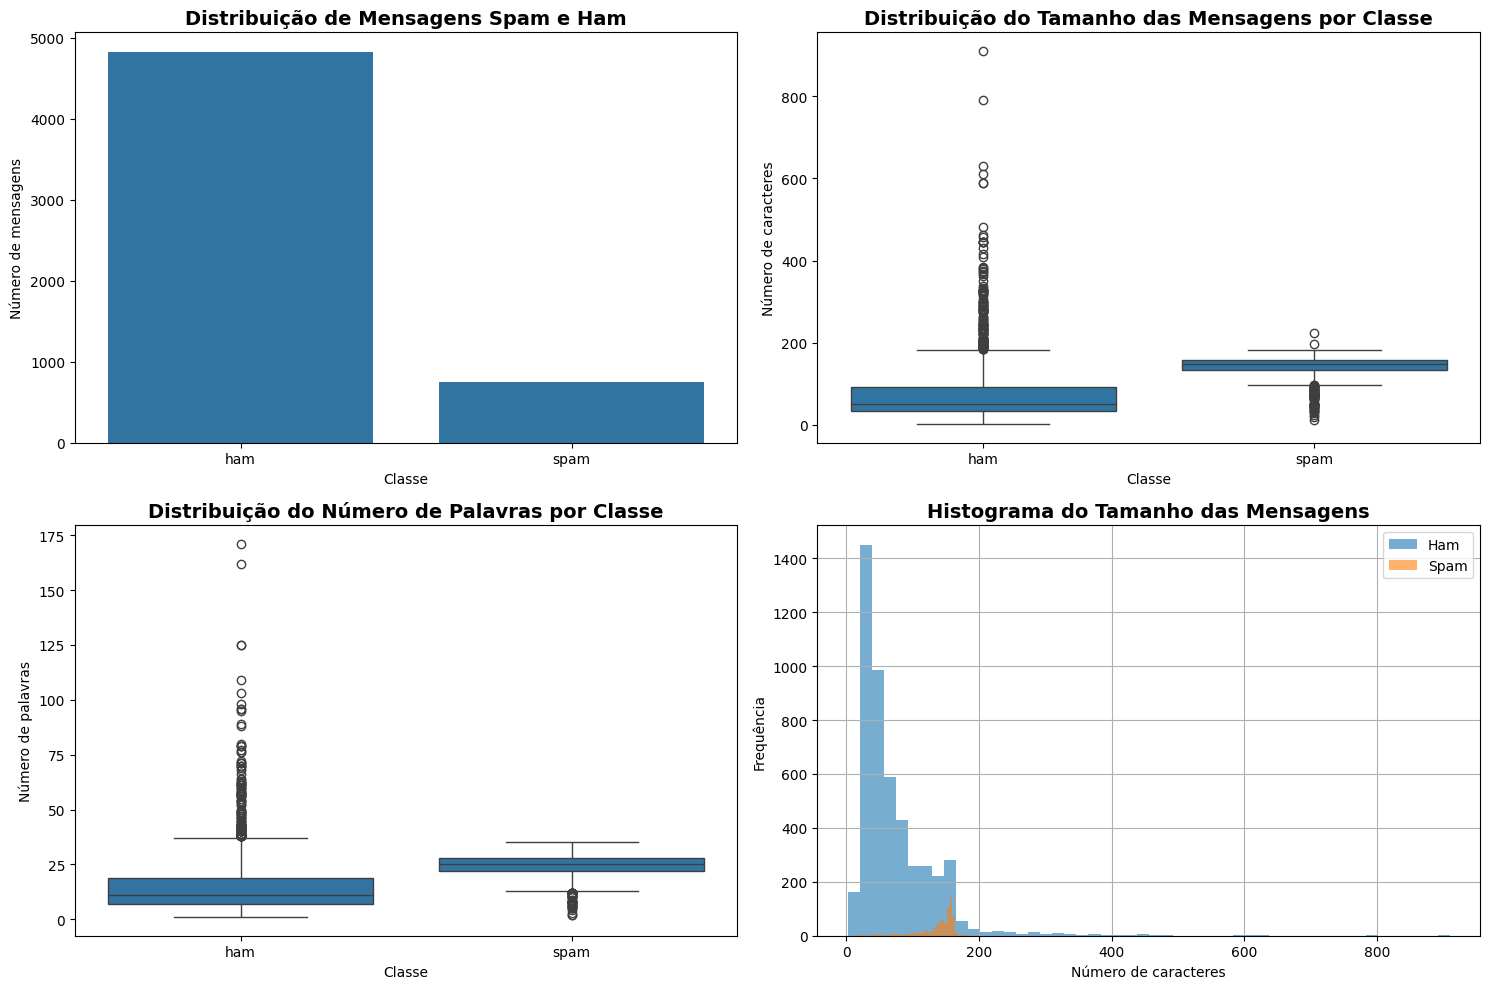


EXEMPLOS DE MENSAGENS

Exemplos de mensagens HAM:
1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2. Ok lar... Joking wif u oni...
3. U dun say so early hor... U c already then say...
4. Nah I don't think he goes to usf, he lives around here though
5. Even my brother is not like to speak with me. They treat me like aids patent.

Exemplos de mensagens SPAM:
1. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2. FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
3. WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
4. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera 

In [ ]:
# ============================================================================
# 3. VISUALIZAÇÕES
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição de classes
sns.countplot(data=df, x='label', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Mensagens Spam e Ham', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Classe')
axes[0, 0].set_ylabel('Número de mensagens')

# Distribuição do tamanho das mensagens
sns.boxplot(data=df, x='label', y='message_length', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição do Tamanho das Mensagens por Classe', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Número de caracteres')

# Distribuição do número de palavras
sns.boxplot(data=df, x='label', y='word_count', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição do Número de Palavras por Classe', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Classe')
axes[1, 0].set_ylabel('Número de palavras')

# Histograma do tamanho das mensagens
df[df['label'] == 'ham']['message_length'].hist(bins=50, alpha=0.6, label='Ham', ax=axes[1, 1])
df[df['label'] == 'spam']['message_length'].hist(bins=50, alpha=0.6, label='Spam', ax=axes[1, 1])
axes[1, 1].set_title('Histograma do Tamanho das Mensagens', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Número de caracteres')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Exemplos de mensagens
print("\n" + "=" * 80)
print("EXEMPLOS DE MENSAGENS")
print("=" * 80)
print("\nExemplos de mensagens HAM:")
for i, msg in enumerate(df[df['label'] == 'ham']['message'].head(5), 1):
    print(f"{i}. {msg}")

print("\nExemplos de mensagens SPAM:")
for i, msg in enumerate(df[df['label'] == 'spam']['message'].head(5), 1):
    print(f"{i}. {msg}")

A análise dos gráficos gerados no pré-processamento indica dois desafios principais para o nosso modelo RNN:

- Desbalanceamento de classes: O número de mensagens "ham" (não spam) é muito maior do que de mensagens "spam", como mostrado no gráfico de barras. Isso pode levar o modelo a priorizar a classe majoritária, prejudicando a detecção de spam.​

- Diferença no comprimento das mensagens: O boxplot mostra que mensagens spam tendem a ser maiores, com menos variabilidade e sem muitos valores extremos. Já mensagens ham são mais variadas em tamanho, com muitos outliers. Modelos RNN podem ser sensíveis a esse tipo de diferença, especialmente na definição do padding/truncating.​


# **4. PRÉ-PROCESSAMENTO DOS DADOS**
 Esta célula transforma as mensagens de texto em dados numéricos que possam ser processados pela RNN.Inclui codificação dos rótulos, tokenização, padding e divisão em conjuntos de treino, validação e teste.

In [ ]:
print("\n" + "=" * 80)
print("PRÉ-PROCESSAMENTO DOS DADOS")
print("=" * 80)

# ----------------------------------------------------------------------------
# 🔢 Conversão dos rótulos
# ----------------------------------------------------------------------------
# Substitui as classes textuais ('ham' e 'spam') por valores numéricos binários (0 e 1)
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

# ----------------------------------------------------------------------------
# 🧹 Preparação de textos e rótulos
# ----------------------------------------------------------------------------
texts = df['message'].values   # Mensagens originais
labels = df['label_encoded'].values  # Labels numéricos correspondentes

# ----------------------------------------------------------------------------
# ⚙️ Parâmetros de tokenização
# ----------------------------------------------------------------------------
MAX_WORDS = 10000  # Número máximo de palavras no vocabulário
MAX_LEN = 100      # Comprimento máximo (em tokens) de cada sequência

# ----------------------------------------------------------------------------
# 🧠 Tokenização
# ----------------------------------------------------------------------------
# A tokenização converte as palavras em inteiros com base na frequência.
# Palavras desconhecidas são marcadas com o token especial <OOV> (Out-Of-Vocabulary).
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)             # Cria o vocabulário
sequences = tokenizer.texts_to_sequences(texts)  # Converte textos em sequências numéricas

# ----------------------------------------------------------------------------
# ⏹️ Padding
# ----------------------------------------------------------------------------
# As sequências são ajustadas para o mesmo comprimento, adicionando zeros ao final das menores.
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y = labels

# ----------------------------------------------------------------------------
# 📋 Relatório do processamento
# ----------------------------------------------------------------------------
print(f"\nVocabulário total: {len(tokenizer.word_index)}")
print(f"Vocabulário usado (limitado): {MAX_WORDS}")
print(f"Comprimento máximo das sequências: {MAX_LEN}")
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

# ----------------------------------------------------------------------------
# 🔀 Divisão em treino, validação e teste
# ----------------------------------------------------------------------------
# O conjunto é dividido em 70% treino, 15% validação e 15% teste.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)  # 0.176 * 0.85 ≈ 0.15

print(f"\nDivisão dos dados:")
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

# ----------------------------------------------------------------------------
# 📊 Distribuição de classes no conjunto de treino
# ----------------------------------------------------------------------------
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Classe {u}: {c} amostras ({c/len(y_train)*100:.1f}%)")

# ----------------------------------------------------------------------------
# Interpretação:
# - As mensagens são convertidas para vetores numéricos uniformes.
# - As classes foram codificadas de forma binária para classificação supervisionada.
# - A divisão garante conjuntos estratificados e equilibrados.
# ----------------------------------------------------------------------------




PRÉ-PROCESSAMENTO DOS DADOS

Vocabulário total: 9010
Vocabulário usado (limitado): 10000
Comprimento máximo das sequências: 100
Shape de X: (5572, 100)
Shape de y: (5572,)

Divisão dos dados:
Treino: 3902 amostras (70.0%)
Validação: 834 amostras (15.0%)
Teste: 836 amostras (15.0%)
  Classe 0: 3379 amostras (86.6%)
  Classe 1: 523 amostras (13.4%)



# **5. CONSTRUÇÃO DO MODELO RNN (LSTM BIDIRECIONAL)**

Esta célula define a arquitetura da Rede Neural Recorrente utilizada para classificar mensagens SMS entre “spam” e “ham”. O modelo combina embeddings de palavras com camadas LSTM bidirecionais para capturar o contexto do texto.

In [ ]:
print("\n" + "=" * 80)
print("CONSTRUÇÃO DO MODELO")
print("=" * 80)

# ----------------------------------------------------------------------------
# ⚙️ Hiperparâmetros principais
# ----------------------------------------------------------------------------
EMBEDDING_DIM = 128   # Dimensão dos vetores de palavras (representação densa)
LSTM_UNITS = 64       # Número de unidades da camada LSTM
DROPOUT_RATE = 0.5    # Taxa de dropout para evitar overfitting

# ----------------------------------------------------------------------------
# 🧠 Arquitetura da Rede Neural
# ----------------------------------------------------------------------------
# - Embedding: transforma palavras em vetores contínuos de tamanho EMBEDDING_DIM.
# - LSTM Bidirecional: lê a sequência nos dois sentidos (frente e trás),
#   capturando dependências contextuais mais amplas.
# - Dropout: desativa aleatoriamente neurônios durante o treino, reduzindo overfitting.
# - Dense (ReLU): camada totalmente conectada intermediária para refinar a representação.
# - Dense (Sigmoid): camada final que gera probabilidade entre 0 (ham) e 1 (spam).
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(LSTM_UNITS, return_sequences=True)),
    Dropout(DROPOUT_RATE),
    Bidirectional(LSTM(LSTM_UNITS // 2)),
    Dropout(DROPOUT_RATE),
    Dense(32, activation='relu'),
    Dropout(DROPOUT_RATE / 2),
    Dense(1, activation='sigmoid')
])

# ----------------------------------------------------------------------------
# ⚡ Compilação do modelo
# ----------------------------------------------------------------------------
# - Otimizador Adam: ajuste automático da taxa de aprendizado.
# - Função de perda Binary Crossentropy: adequada para classificação binária.
# - Métricas: acurácia, precisão e recall (importantes em datasets desbalanceados).
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# ----------------------------------------------------------------------------
# 📋 Resumo da arquitetura
# ----------------------------------------------------------------------------
print("\nArquitetura do modelo:")
model.summary()

# ----------------------------------------------------------------------------
# Interpretação:
# - As camadas LSTM capturam relações sequenciais entre palavras.
# - O uso de duas camadas bidirecionais melhora a compreensão de dependências de longo prazo.
# - A camada densa final com sigmoid retorna a probabilidade de uma mensagem ser spam.
# ----------------------------------------------------------------------------



CONSTRUÇÃO DO MODELO


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Arquitetura do modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


# **6. TREINAMENTO DO MODELO**

Esta célula realiza o treinamento da RNN bidirecional usando os dados de treino e validação.São aplicadas técnicas de regularização e ajuste dinâmico da taxa de aprendizado para otimizar o desempenho.

In [ ]:
print("\n" + "=" * 80)
print("TREINAMENTO DO MODELO")
print("=" * 80)

# ----------------------------------------------------------------------------
# ⚙️ Callbacks — mecanismos automáticos de controle durante o treino
# ----------------------------------------------------------------------------
# EarlyStopping: interrompe o treino se a validação parar de melhorar, evitando overfitting.
early_stopping = EarlyStopping(
    monitor='val_loss',          # métrica monitorada
    patience=5,                  # número de épocas sem melhora antes de parar
    restore_best_weights=True,   # restaura os melhores pesos obtidos
    verbose=1
)

# ReduceLROnPlateau: reduz a taxa de aprendizado quando a validação estagna.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # métrica monitorada
    factor=0.5,           # reduz a taxa de aprendizado pela metade
    patience=3,           # número de épocas sem melhora antes da redução
    min_lr=1e-7,          # limite mínimo da taxa de aprendizado
    verbose=1
)

# ----------------------------------------------------------------------------
# 🔧 Hiperparâmetros de treinamento
# ----------------------------------------------------------------------------
BATCH_SIZE = 32   # Número de amostras processadas antes da atualização dos pesos
EPOCHS = 30       # Número máximo de iterações completas sobre o dataset

# ----------------------------------------------------------------------------
# 🚀 Execução do treinamento
# ----------------------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ----------------------------------------------------------------------------
# Interpretação:
# - O modelo ajusta seus pesos em cada época com base no erro de treino.
# - O EarlyStopping garante que o treino pare antes de sobreajustar os dados.
# - O ReduceLROnPlateau permite ajustes finos quando a melhoria desacelera.
# - As métricas de validação guiam o ponto ótimo de generalização.
# ----------------------------------------------------------------------------



TREINAMENTO DO MODELO
Epoch 1/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8650 - loss: 0.3348 - precision: 0.5657 - recall: 0.3642 - val_accuracy: 0.9808 - val_loss: 0.0707 - val_precision: 0.9444 - val_recall: 0.9107 - learning_rate: 0.0010
Epoch 2/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9943 - loss: 0.0317 - precision: 0.9903 - recall: 0.9651 - val_accuracy: 0.9856 - val_loss: 0.0620 - val_precision: 0.9545 - val_recall: 0.9375 - learning_rate: 0.0010
Epoch 3/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9947 - loss: 0.0223 - precision: 0.9963 - recall: 0.9653 - val_accuracy: 0.9904 - val_loss: 0.0513 - val_precision: 0.9727 - val_recall: 0.9554 - learning_rate: 0.0010
Epoch 4/30
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9999 - loss: 0.0028 - precision: 1.0000 - recall: 0.9992 - val_accuracy: 0.9868 - val_loss: 0.0697 - val_precision: 0.9391 - val_recall: 0.9643 - learning_rate: 0.0010
Epoch 5/30
122/122 ━━━━━━━━━━━━━━━━━


# **7. VISUALIZAÇÃO DO TREINAMENTO**
Plota as curvas de loss, acurácia, precisão e recall para treino e validação.

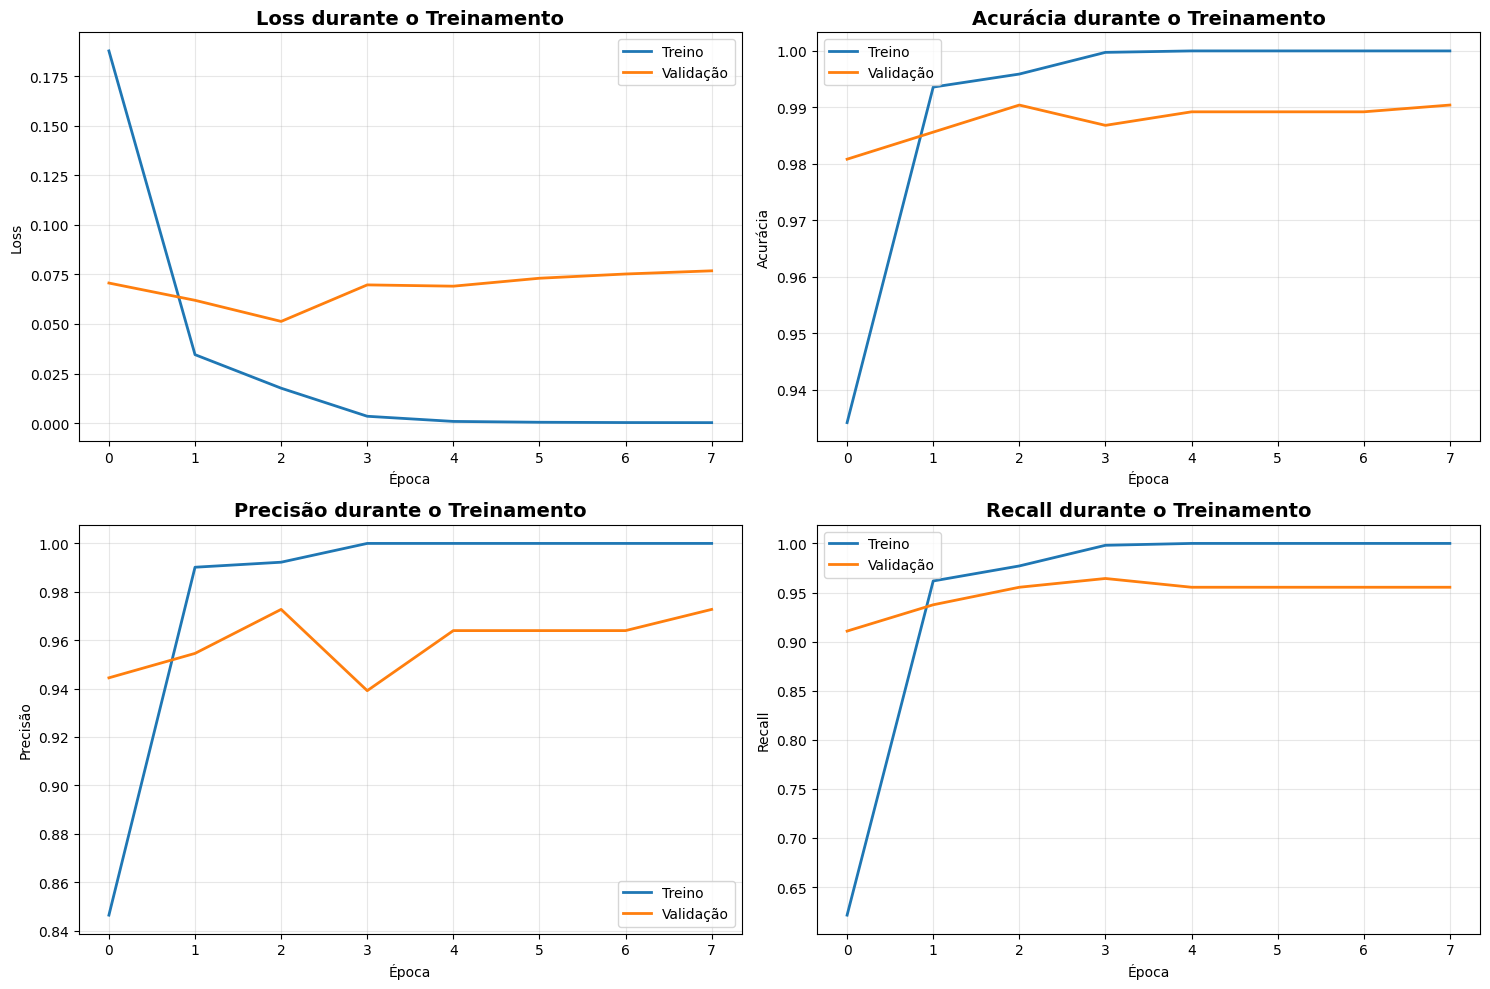

In [ ]:
# ============================================================================
# 7. VISUALIZAÇÃO DO TREINAMENTO
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Treino', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validação', linewidth=2)
axes[0, 0].set_title('Loss durante o Treinamento', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Treino', linewidth=2)
axes[0, 1].plot(history.history['val_accuracy'], label='Validação', linewidth=2)
axes[0, 1].set_title('Acurácia durante o Treinamento', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Acurácia')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
axes[1, 0].plot(history.history['precision'], label='Treino', linewidth=2)
axes[1, 0].plot(history.history['val_precision'], label='Validação', linewidth=2)
axes[1, 0].set_title('Precisão durante o Treinamento', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Precisão')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Recall
axes[1, 1].plot(history.history['recall'], label='Treino', linewidth=2)
axes[1, 1].plot(history.history['val_recall'], label='Validação', linewidth=2)
axes[1, 1].set_title('Recall durante o Treinamento', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Época')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# **8. AVALIAÇÃO NO CONJUNTO DE TESTE**

Esta célula avalia o desempenho final do modelo no conjunto de teste,
verificando sua capacidade de generalização e interpretando os principais indicadores de desempenho.


AVALIAÇÃO NO CONJUNTO DE TESTE
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

Métricas no conjunto de teste:
  Loss: 0.0897
  Acurácia: 0.9809
  Precisão: 0.9706
  Recall: 0.8839
  F1-Score: 0.9252

Relatório de Classificação:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       724
        Spam       0.97      0.88      0.93       112

    accuracy                           0.98       836
   macro avg       0.98      0.94      0.96       836
weighted avg       0.98      0.98      0.98       836



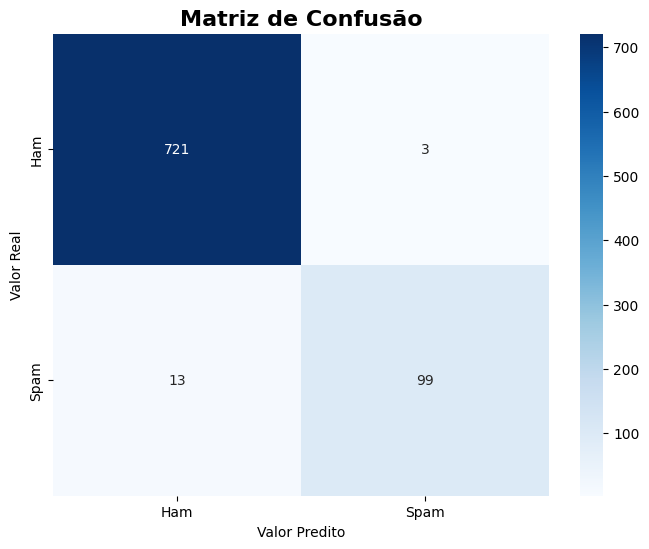

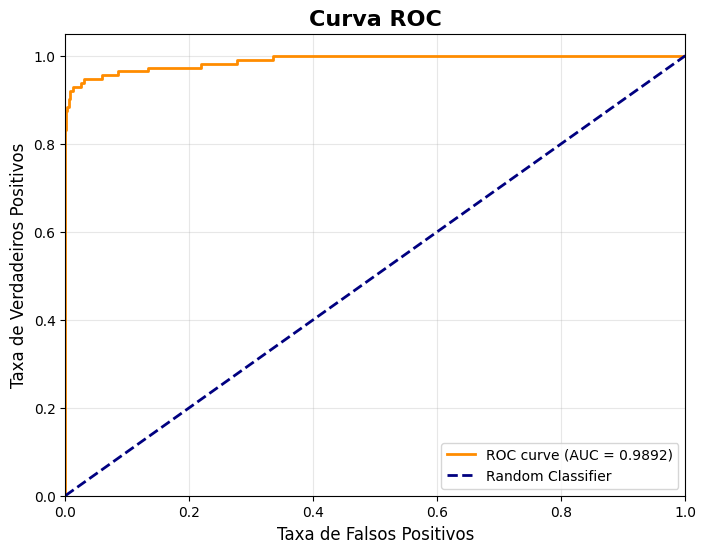

In [ ]:
print("\n" + "=" * 80)
print("AVALIAÇÃO NO CONJUNTO DE TESTE")
print("=" * 80)

# Predições
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Métricas
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"\nMétricas no conjunto de teste:")
print(f"  Loss: {test_loss:.4f}")
print(f"  Acurácia: {test_acc:.4f}")
print(f"  Precisão: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1-Score: {test_f1:.4f}")

print(f"\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Matriz de Confusão', fontsize=16, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curva ROC', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()



# **9. ANÁLISE DE ERROS**

Esta célula identifica e exibe exemplos de classificações incorretas feitas pelo modelo.O objetivo é entender onde a RNN ainda falha e quais padrões textuais confundem o classificador.

In [ ]:
print("\n" + "=" * 80)
print("ANÁLISE DE ERROS")
print("=" * 80)

# Encontrar índices dos erros
error_indices = np.where(y_pred != y_test)[0]
print(f"\nTotal de erros: {len(error_indices)} ({len(error_indices)/len(y_test)*100:.2f}%)")

# Falsos Positivos (Ham classificado como Spam)
fp_indices = np.where((y_pred == 1) & (y_test == 0))[0]
print(f"Falsos Positivos: {len(fp_indices)}")

# Falsos Negativos (Spam classificado como Ham)
fn_indices = np.where((y_pred == 0) & (y_test == 1))[0]
print(f"Falsos Negativos: {len(fn_indices)}")

# Reconstruir mensagens originais para análise
test_indices = X_temp.shape[0] - X_val.shape[0]
original_test_messages = df.iloc[-X_test.shape[0]:]['message'].values

if len(fp_indices) > 0:
    print(f"\nExemplos de Falsos Positivos (Ham → Spam):")
    for i, idx in enumerate(fp_indices[:3], 1):
        print(f"{i}. Confiança: {y_pred_proba[idx][0]:.4f}")
        print(f"   Mensagem: {original_test_messages[idx]}\n")

if len(fn_indices) > 0:
    print(f"\nExemplos de Falsos Negativos (Spam → Ham):")
    for i, idx in enumerate(fn_indices[:3], 1):
        print(f"{i}. Confiança: {y_pred_proba[idx][0]:.4f}")
        print(f"   Mensagem: {original_test_messages[idx]}\n")


ANÁLISE DE ERROS

Total de erros: 16 (1.91%)
Falsos Positivos: 3
Falsos Negativos: 13

Exemplos de Falsos Positivos (Ham → Spam):
1. Confiança: 0.9967
   Mensagem: U repeat e instructions again. Wat's e road name of ur house?

2. Confiança: 0.9177
   Mensagem: Yeah just open chat and click friend lists. Then make the list. Easy as pie

3. Confiança: 0.6660
   Mensagem: Thanx a lot 4 ur help!


Exemplos de Falsos Negativos (Spam → Ham):
1. Confiança: 0.0632
   Mensagem: URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09061790121 from land line. Claim 3030. Valid 12hrs only 150ppm

2. Confiança: 0.0021
   Mensagem: Send me your resume:-)

3. Confiança: 0.0052
   Mensagem: Edison has rightly said, "A fool can ask more questions than a wise man can answer" Now you know why all of us are speechless during ViVa.. GM,GN,GE,GNT:-)




# **10. TESTE COM NOVAS MENSAGENS**
Esta célula aplica o modelo treinado em mensagens inéditas para avaliar seu comportamento fora do dataset original e verificar sua capacidade de generalização.

In [ ]:
# ============================================================================
# 10. TESTE COM NOVAS MENSAGENS
# ============================================================================

print("\n" + "=" * 80)
print("TESTE COM NOVAS MENSAGENS")
print("=" * 80)

def predict_message(message, model, tokenizer, max_len):
    """Prediz se uma mensagem é spam ou ham"""
    sequence = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded, verbose=0)[0][0]
    label = 'SPAM' if prediction > 0.5 else 'HAM'
    confidence = prediction if prediction > 0.5 else 1 - prediction
    return label, confidence

# Mensagens de teste
test_messages = [
    "Hey, how are you doing today?",
    "Congratulations! You've won a free iPhone. Click here to claim your prize now!",
    "Can we meet for coffee tomorrow?",
    "URGENT! Your account will be closed. Reply with your password immediately.",
    "Thanks for the dinner last night, it was great!",
    "FREE entry to win a £1000 prize! Text WIN to 12345",
]

print("\nPredições para novas mensagens:\n")
for i, msg in enumerate(test_messages, 1):
    label, confidence = predict_message(msg, model, tokenizer, MAX_LEN)
    print(f"{i}. Mensagem: '{msg}'")
    print(f"   Predição: {label} (Confiança: {confidence*100:.2f}%)\n")


TESTE COM NOVAS MENSAGENS

Predições para novas mensagens:

1. Mensagem: 'Hey, how are you doing today?'
   Predição: HAM (Confiança: 99.94%)

2. Mensagem: 'Congratulations! You've won a free iPhone. Click here to claim your prize now!'
   Predição: SPAM (Confiança: 99.91%)

3. Mensagem: 'Can we meet for coffee tomorrow?'
   Predição: HAM (Confiança: 99.97%)

4. Mensagem: 'URGENT! Your account will be closed. Reply with your password immediately.'
   Predição: SPAM (Confiança: 99.63%)

5. Mensagem: 'Thanks for the dinner last night, it was great!'
   Predição: HAM (Confiança: 99.92%)

6. Mensagem: 'FREE entry to win a £1000 prize! Text WIN to 12345'
   Predição: SPAM (Confiança: 99.92%)



REFERÊNCIAS:

[1] SMS Spam Collection Data Set - UCI Machine Learning Repository. Disponível em: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

[2] TensorFlow. LSTM for text classification. Disponível em: https://www.tensorflow.org/tutorials/text/text_classification_rnn

[3] Perplexity AI

[4] Claude Ai

[5] ChatGPT

[4] https://www.geeksforgeeks.org/deep-learning/sms-spam-detection-using-tensorflow-in-python/

[5] https://sist.sathyabama.ac.in/sist_naac/documents/1.3.4/1822-b.e-cse-batchno-109.pdf

[6] Almeida, T.A., Hidalgo, J.M.G., Yamakami, A. (2011).
    "Contributions to the Study of SMS Spam Filtering: New Collection and Results"
    Proceedings of the 11th ACM Symposium on Document Engineering (DOCENG'11)
    
[7] Hochreiter, S., & Schmidhuber, J. (1997).
    "Long Short-Term Memory". Neural Computation, 9(8), 1735-1780.
    
[8] Schuster, M., & Paliwal, K. K. (1997).
    "Bidirectional Recurrent Neural Networks". IEEE Transactions on Signal Processing.
    
[9] Chollet, F. et al. (2015). Keras.
    GitHub Repository: https://github.com/keras-team/keras
    
[10] Abadi, M. et al. (2015). TensorFlow: Large-Scale Machine Learning on Heterogeneous Systems.
    Software available from tensorflow.org
    
[11] Goodfellow, I., Bengio, Y., & Courville, A. (2016).
    "Deep Learning". MIT Press. http://www.deeplearningbook.org
    
[12] UCI Machine Learning Repository. (2012).
    "SMS Spam Collection Data Set"
    https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

Alguns dos prompts recuperados:

"Baixei o dataset, agora me de um direcionamento para eu começar a resolução do meu problema."

“Documente esse trabalho a seguir.”

"Preciso balancear as minhas classes." (forcenemos as imagens de saída)

"Quero agora graficos para visualização do meu problema."

"Preciso fazer a análise exploratória e pré-processamento dos dados."
